In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

import torch
import torchvision
from torchvision import transforms
import ignite
from ignite.engine import create_supervised_evaluator

import backdoor_attack as bd
import backdoor_attack.plot_util
import net

In [2]:
# device setup
if torch.cuda.is_available():
    device = torch.device(type='cuda', index=1)
else:
    device = torch.device(type='cpu')

In [3]:
transform = transforms.Compose([
    transforms.ToTensor()
])

In [4]:
ds_root = os.path.join('.', 'results', 'datasets')
tr = np.load(os.path.join(ds_root, 'distillation_training_dataset.npz'))
#train_ds = bd.Dataset_from_array(x=tr['x'], t=tr['t'], transform=transform)
te = np.load(os.path.join(ds_root, 'clean_test_dataset.npz'))
test_ds = bd.Dataset_from_array(x=te['x'], t=te['t'], transform=transform)
te_p = np.load(os.path.join(ds_root, 'poison_test_dataset.npz'))
test_p_ds = bd.Dataset_from_array(x=te_p['x'], t=te_p['t_correct'], transform=transform)

#train_dl = torch.utils.data.DataLoader(train_ds, batch_size=128, shuffle=True)
test_dl = torch.utils.data.DataLoader(test_ds, batch_size=128, shuffle=False)
test_p_dl = torch.utils.data.DataLoader(test_p_ds, batch_size=128, shuffle=False)

### 教師モデル

In [5]:
teacher_path = os.path.join('results', 'backdoor_model')
teacher_model = net.CNV()
dummy_input = torch.Tensor(np.zeros((1, 1, 28, 28)).astype(np.float32))
teacher_model(dummy_input)
teacher_model.load_state_dict(torch.load(os.path.join(teacher_path, 'best_model.pt')))
teacher_model = teacher_model.eval()

## 蒸留

1/50 Epoch, Train/Test Loss: 2.0951/2.1816,         Train/Test Accuracy: 0.2880/0.2748,         Temperature: tensor([20], device='cuda:1'),         Elapsed/Remaining time: 0.01/0.49 [min]
2/50 Epoch, Train/Test Loss: 1.5948/1.7376,         Train/Test Accuracy: 0.7490/0.7286,         Temperature: tensor([20], device='cuda:1'),         Elapsed/Remaining time: 0.02/0.46 [min]
3/50 Epoch, Train/Test Loss: 1.4519/1.6974,         Train/Test Accuracy: 0.8510/0.8351,         Temperature: tensor([20], device='cuda:1'),         Elapsed/Remaining time: 0.03/0.44 [min]
4/50 Epoch, Train/Test Loss: 1.0742/1.3336,         Train/Test Accuracy: 0.8540/0.8361,         Temperature: tensor([20], device='cuda:1'),         Elapsed/Remaining time: 0.04/0.42 [min]
5/50 Epoch, Train/Test Loss: 1.1962/1.5139,         Train/Test Accuracy: 0.8680/0.8501,         Temperature: tensor([20], device='cuda:1'),         Elapsed/Remaining time: 0.05/0.42 [min]
6/50 Epoch, Train/Test Loss: 0.8944/1.2624,         Train/Te

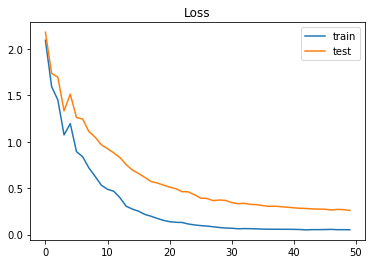

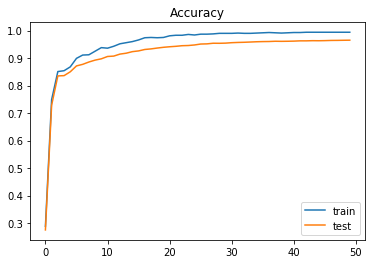

Accuracy: 0.9651


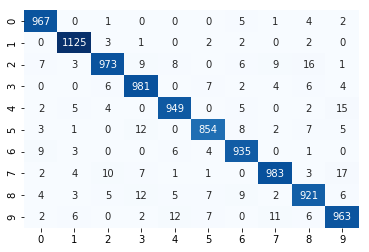

Accuracy: 0.9653366027641551


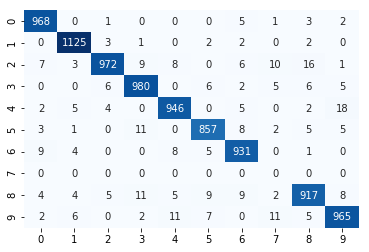

1/50 Epoch, Train/Test Loss: 1.8896/1.8746,         Train/Test Accuracy: 0.7200/0.7241,         Temperature: tensor([20], device='cuda:1'),         Elapsed/Remaining time: 0.01/0.48 [min]
2/50 Epoch, Train/Test Loss: 1.0862/1.1647,         Train/Test Accuracy: 0.8605/0.8599,         Temperature: tensor([20], device='cuda:1'),         Elapsed/Remaining time: 0.02/0.51 [min]
3/50 Epoch, Train/Test Loss: 1.0544/1.1450,         Train/Test Accuracy: 0.8780/0.8772,         Temperature: tensor([20], device='cuda:1'),         Elapsed/Remaining time: 0.03/0.51 [min]
4/50 Epoch, Train/Test Loss: 0.8784/1.0538,         Train/Test Accuracy: 0.9100/0.8966,         Temperature: tensor([20], device='cuda:1'),         Elapsed/Remaining time: 0.04/0.49 [min]
5/50 Epoch, Train/Test Loss: 0.6827/0.8581,         Train/Test Accuracy: 0.9230/0.9090,         Temperature: tensor([20], device='cuda:1'),         Elapsed/Remaining time: 0.05/0.49 [min]
6/50 Epoch, Train/Test Loss: 0.5242/0.7482,         Train/Te

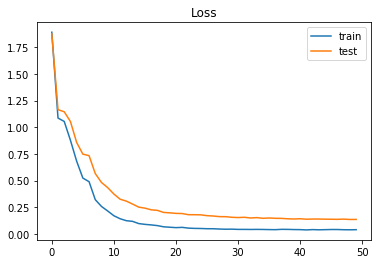

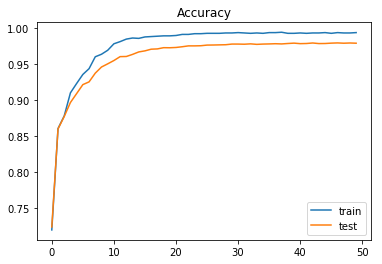

Accuracy: 0.9792


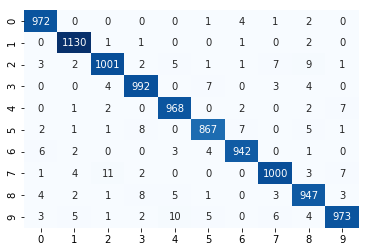

Accuracy: 0.9802719572001783


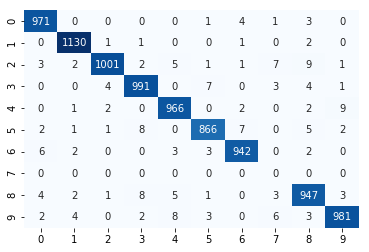

1/50 Epoch, Train/Test Loss: 1.6887/1.6677,         Train/Test Accuracy: 0.8257/0.8349,         Temperature: tensor([20], device='cuda:1'),         Elapsed/Remaining time: 0.01/0.71 [min]
2/50 Epoch, Train/Test Loss: 1.1163/1.1454,         Train/Test Accuracy: 0.8773/0.8785,         Temperature: tensor([20], device='cuda:1'),         Elapsed/Remaining time: 0.03/0.72 [min]
3/50 Epoch, Train/Test Loss: 0.9062/0.9965,         Train/Test Accuracy: 0.8973/0.8944,         Temperature: tensor([20], device='cuda:1'),         Elapsed/Remaining time: 0.05/0.72 [min]
4/50 Epoch, Train/Test Loss: 0.6877/0.8542,         Train/Test Accuracy: 0.9217/0.9116,         Temperature: tensor([20], device='cuda:1'),         Elapsed/Remaining time: 0.06/0.71 [min]
5/50 Epoch, Train/Test Loss: 0.5078/0.7071,         Train/Test Accuracy: 0.9373/0.9260,         Temperature: tensor([20], device='cuda:1'),         Elapsed/Remaining time: 0.08/0.68 [min]
6/50 Epoch, Train/Test Loss: 0.3724/0.5621,         Train/Te

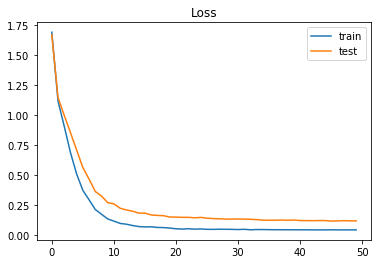

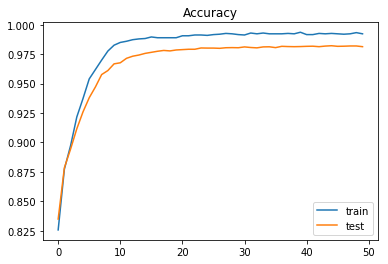

Accuracy: 0.9822


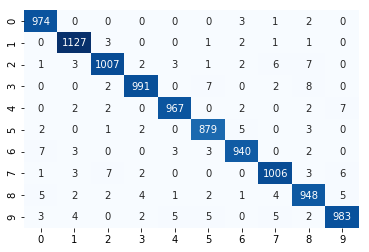

Accuracy: 0.9826125724476148


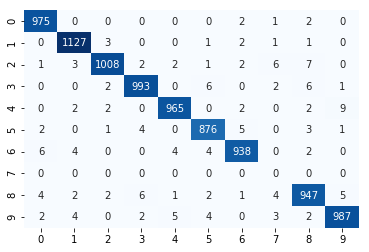

1/50 Epoch, Train/Test Loss: 1.2647/1.1980,         Train/Test Accuracy: 0.8390/0.8445,         Temperature: tensor([20], device='cuda:1'),         Elapsed/Remaining time: 0.01/0.66 [min]
2/50 Epoch, Train/Test Loss: 1.0890/1.0680,         Train/Test Accuracy: 0.8858/0.8899,         Temperature: tensor([20], device='cuda:1'),         Elapsed/Remaining time: 0.03/0.67 [min]
3/50 Epoch, Train/Test Loss: 0.7086/0.7065,         Train/Test Accuracy: 0.9207/0.9210,         Temperature: tensor([20], device='cuda:1'),         Elapsed/Remaining time: 0.05/0.72 [min]
4/50 Epoch, Train/Test Loss: 0.5044/0.5790,         Train/Test Accuracy: 0.9407/0.9359,         Temperature: tensor([20], device='cuda:1'),         Elapsed/Remaining time: 0.06/0.72 [min]
5/50 Epoch, Train/Test Loss: 0.3313/0.4046,         Train/Test Accuracy: 0.9583/0.9524,         Temperature: tensor([20], device='cuda:1'),         Elapsed/Remaining time: 0.08/0.70 [min]
6/50 Epoch, Train/Test Loss: 0.2340/0.3111,         Train/Te

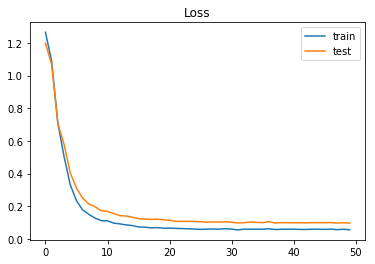

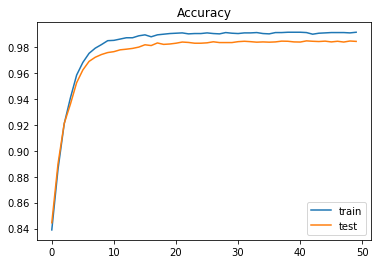

Accuracy: 0.9846


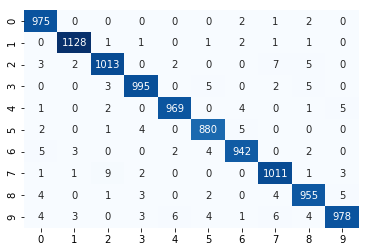

Accuracy: 0.9848417298261257


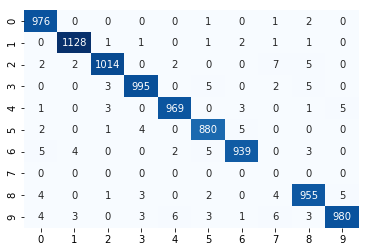

1/50 Epoch, Train/Test Loss: 1.5765/1.4503,         Train/Test Accuracy: 0.8426/0.8518,         Temperature: tensor([20], device='cuda:1'),         Elapsed/Remaining time: 0.02/0.74 [min]
2/50 Epoch, Train/Test Loss: 0.9133/0.8820,         Train/Test Accuracy: 0.8980/0.9026,         Temperature: tensor([20], device='cuda:1'),         Elapsed/Remaining time: 0.03/0.76 [min]
3/50 Epoch, Train/Test Loss: 0.6212/0.6404,         Train/Test Accuracy: 0.9262/0.9240,         Temperature: tensor([20], device='cuda:1'),         Elapsed/Remaining time: 0.05/0.75 [min]
4/50 Epoch, Train/Test Loss: 0.3737/0.4211,         Train/Test Accuracy: 0.9500/0.9480,         Temperature: tensor([20], device='cuda:1'),         Elapsed/Remaining time: 0.07/0.76 [min]
5/50 Epoch, Train/Test Loss: 0.2856/0.3293,         Train/Test Accuracy: 0.9626/0.9596,         Temperature: tensor([20], device='cuda:1'),         Elapsed/Remaining time: 0.09/0.77 [min]
6/50 Epoch, Train/Test Loss: 0.2048/0.2606,         Train/Te

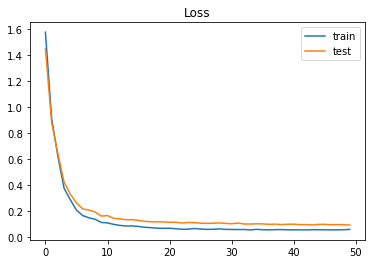

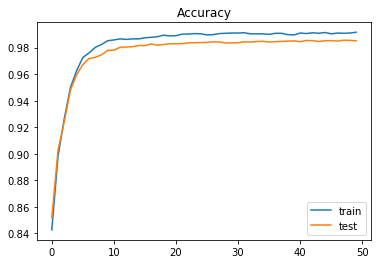

Accuracy: 0.9856


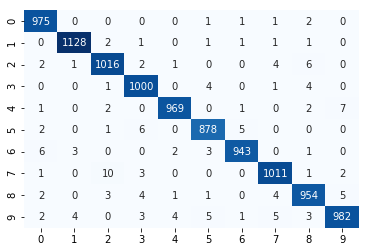

Accuracy: 0.9857333927775301


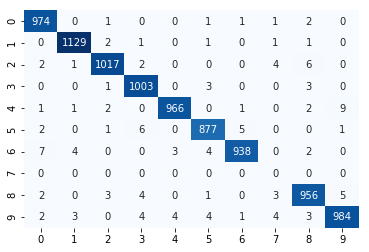

1/50 Epoch, Train/Test Loss: 1.2353/1.1847,         Train/Test Accuracy: 0.8668/0.8737,         Temperature: tensor([20], device='cuda:1'),         Elapsed/Remaining time: 0.02/1.00 [min]
2/50 Epoch, Train/Test Loss: 0.7742/0.7766,         Train/Test Accuracy: 0.9168/0.9177,         Temperature: tensor([20], device='cuda:1'),         Elapsed/Remaining time: 0.04/1.00 [min]
3/50 Epoch, Train/Test Loss: 0.5098/0.5440,         Train/Test Accuracy: 0.9438/0.9401,         Temperature: tensor([20], device='cuda:1'),         Elapsed/Remaining time: 0.06/0.99 [min]
4/50 Epoch, Train/Test Loss: 0.3267/0.3504,         Train/Test Accuracy: 0.9613/0.9582,         Temperature: tensor([20], device='cuda:1'),         Elapsed/Remaining time: 0.08/0.98 [min]
5/50 Epoch, Train/Test Loss: 0.2336/0.2514,         Train/Test Accuracy: 0.9700/0.9681,         Temperature: tensor([20], device='cuda:1'),         Elapsed/Remaining time: 0.11/0.96 [min]
6/50 Epoch, Train/Test Loss: 0.1782/0.2018,         Train/Te

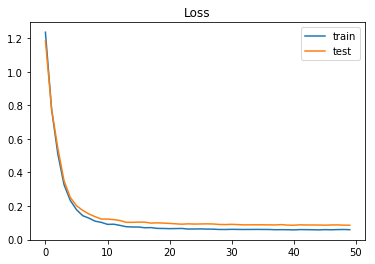

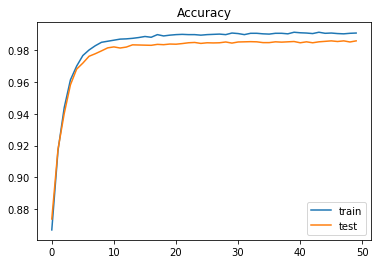

Accuracy: 0.9859


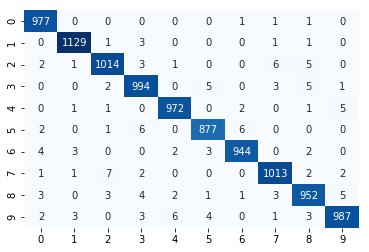

Accuracy: 0.9858448506464557


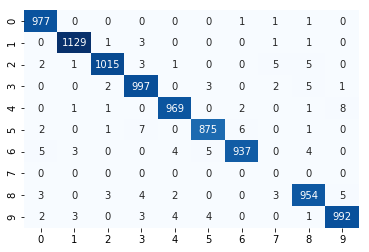

1/50 Epoch, Train/Test Loss: 1.0685/1.0051,         Train/Test Accuracy: 0.8856/0.8908,         Temperature: tensor([20], device='cuda:1'),         Elapsed/Remaining time: 0.02/0.98 [min]
2/50 Epoch, Train/Test Loss: 0.7390/0.7336,         Train/Test Accuracy: 0.9233/0.9217,         Temperature: tensor([20], device='cuda:1'),         Elapsed/Remaining time: 0.04/0.96 [min]
3/50 Epoch, Train/Test Loss: 0.3924/0.4244,         Train/Test Accuracy: 0.9517/0.9500,         Temperature: tensor([20], device='cuda:1'),         Elapsed/Remaining time: 0.06/0.94 [min]
4/50 Epoch, Train/Test Loss: 0.2557/0.2730,         Train/Test Accuracy: 0.9660/0.9646,         Temperature: tensor([20], device='cuda:1'),         Elapsed/Remaining time: 0.08/0.93 [min]
5/50 Epoch, Train/Test Loss: 0.1765/0.2089,         Train/Test Accuracy: 0.9764/0.9718,         Temperature: tensor([20], device='cuda:1'),         Elapsed/Remaining time: 0.11/0.95 [min]
6/50 Epoch, Train/Test Loss: 0.1471/0.1739,         Train/Te

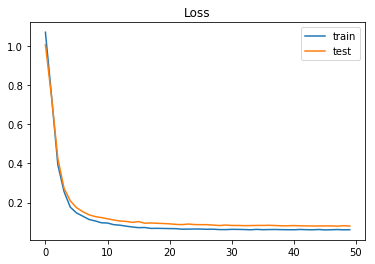

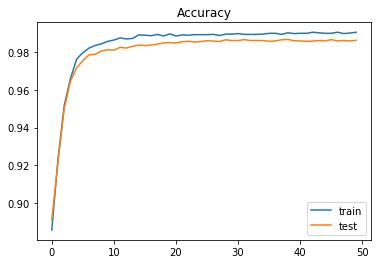

Accuracy: 0.9869


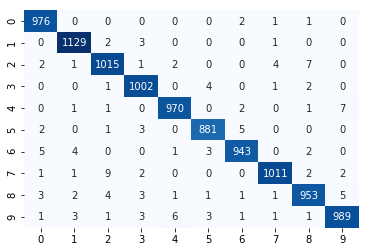

Accuracy: 0.9871823450735622


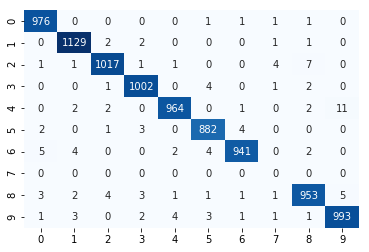

1/50 Epoch, Train/Test Loss: 1.0520/1.0084,         Train/Test Accuracy: 0.8909/0.8994,         Temperature: tensor([20], device='cuda:1'),         Elapsed/Remaining time: 0.02/1.04 [min]
2/50 Epoch, Train/Test Loss: 0.5447/0.5568,         Train/Test Accuracy: 0.9411/0.9369,         Temperature: tensor([20], device='cuda:1'),         Elapsed/Remaining time: 0.04/1.02 [min]
3/50 Epoch, Train/Test Loss: 0.2941/0.3166,         Train/Test Accuracy: 0.9630/0.9611,         Temperature: tensor([20], device='cuda:1'),         Elapsed/Remaining time: 0.06/1.02 [min]
4/50 Epoch, Train/Test Loss: 0.2090/0.2233,         Train/Test Accuracy: 0.9728/0.9693,         Temperature: tensor([20], device='cuda:1'),         Elapsed/Remaining time: 0.09/1.00 [min]
5/50 Epoch, Train/Test Loss: 0.1608/0.1846,         Train/Test Accuracy: 0.9784/0.9754,         Temperature: tensor([20], device='cuda:1'),         Elapsed/Remaining time: 0.11/0.98 [min]
6/50 Epoch, Train/Test Loss: 0.1371/0.1511,         Train/Te

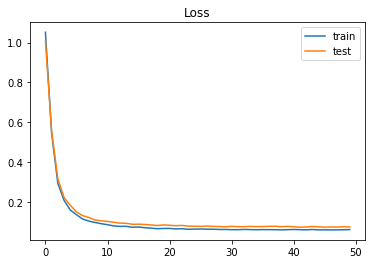

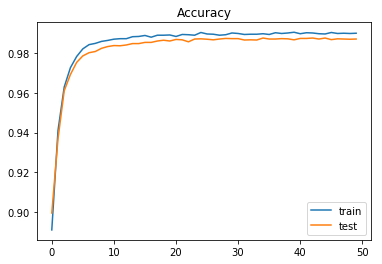

Accuracy: 0.9877


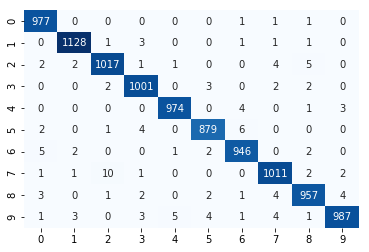

Accuracy: 0.9881854658938921


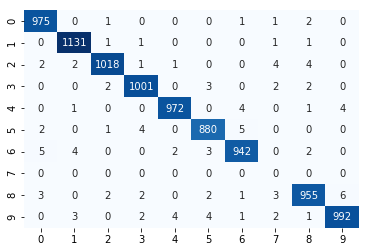

1/50 Epoch, Train/Test Loss: 0.9642/0.9128,         Train/Test Accuracy: 0.9002/0.9039,         Temperature: tensor([20], device='cuda:1'),         Elapsed/Remaining time: 0.03/1.27 [min]
2/50 Epoch, Train/Test Loss: 0.4655/0.4786,         Train/Test Accuracy: 0.9467/0.9431,         Temperature: tensor([20], device='cuda:1'),         Elapsed/Remaining time: 0.05/1.28 [min]
3/50 Epoch, Train/Test Loss: 0.2627/0.2765,         Train/Test Accuracy: 0.9674/0.9656,         Temperature: tensor([20], device='cuda:1'),         Elapsed/Remaining time: 0.08/1.33 [min]
4/50 Epoch, Train/Test Loss: 0.1876/0.1975,         Train/Test Accuracy: 0.9756/0.9743,         Temperature: tensor([20], device='cuda:1'),         Elapsed/Remaining time: 0.11/1.30 [min]
5/50 Epoch, Train/Test Loss: 0.1470/0.1647,         Train/Test Accuracy: 0.9809/0.9775,         Temperature: tensor([20], device='cuda:1'),         Elapsed/Remaining time: 0.14/1.25 [min]
6/50 Epoch, Train/Test Loss: 0.1280/0.1392,         Train/Te

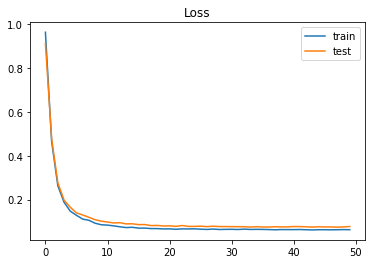

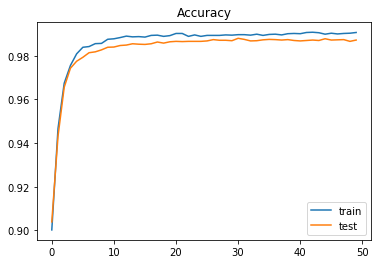

Accuracy: 0.988


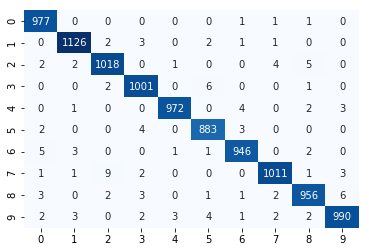

Accuracy: 0.9874052608114133


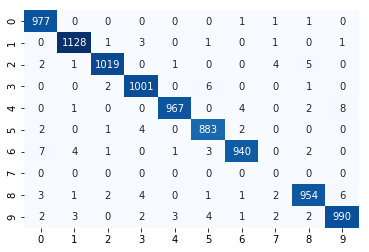

1/50 Epoch, Train/Test Loss: 0.9237/0.8645,         Train/Test Accuracy: 0.9056/0.9102,         Temperature: tensor([20], device='cuda:1'),         Elapsed/Remaining time: 0.02/1.18 [min]
2/50 Epoch, Train/Test Loss: 0.4344/0.4372,         Train/Test Accuracy: 0.9492/0.9498,         Temperature: tensor([20], device='cuda:1'),         Elapsed/Remaining time: 0.05/1.21 [min]
3/50 Epoch, Train/Test Loss: 0.2071/0.2155,         Train/Test Accuracy: 0.9716/0.9727,         Temperature: tensor([20], device='cuda:1'),         Elapsed/Remaining time: 0.08/1.22 [min]
4/50 Epoch, Train/Test Loss: 0.1603/0.1805,         Train/Test Accuracy: 0.9789/0.9770,         Temperature: tensor([20], device='cuda:1'),         Elapsed/Remaining time: 0.10/1.20 [min]
5/50 Epoch, Train/Test Loss: 0.1248/0.1455,         Train/Test Accuracy: 0.9826/0.9789,         Temperature: tensor([20], device='cuda:1'),         Elapsed/Remaining time: 0.14/1.23 [min]
6/50 Epoch, Train/Test Loss: 0.1107/0.1318,         Train/Te

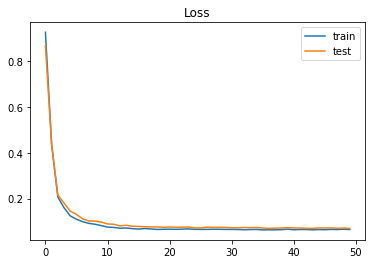

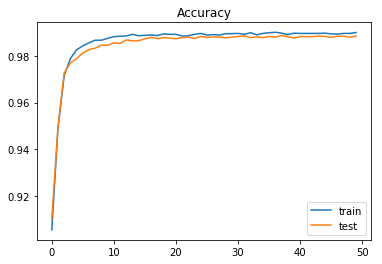

Accuracy: 0.9887


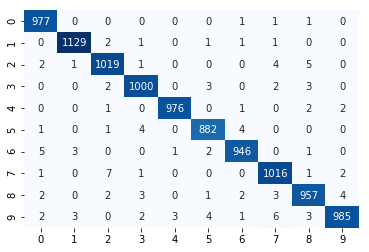

Accuracy: 0.9889656709763709


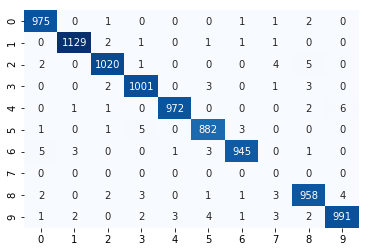

In [6]:
# result output folder
out = os.path.join('results', 'distilled_model')
os.makedirs(os.path.join(out), exist_ok=True)

acc = {'clean_test':[], 'poison_test':[]}
# 1000 to 10000
for N in range(1000, 10000+1, 1000):
    out2 = os.path.join(out, '{}'.format(N))
    os.makedirs(out2, exist_ok=True)

    # Dataset
    train_ds = bd.Dataset_from_array(x=tr['x'][:N], t=tr['t'][:N], transform=transform)
    train_dl = torch.utils.data.DataLoader(train_ds, batch_size=128, shuffle=True)

    # Model
    student_model = net.CNV()
    _ = student_model(dummy_input)

    trainer = bd.distillation.Distillator(train_dl, test_dl, teacher_model, student_model, device)
    optimizer = torch.optim.Adam
    epoch = 50

    # when the training epoch achieved any temp['epoch'], 
    # the temperature is update to corresponding value
    temp = {
        'epoch': np.array([0]),
        't': np.array([20]),
    }

    trainer.run(optimizer, epoch, temp, out2)

    # Save result
    torch.save(student_model.state_dict(), os.path.join(out2, 'final_model.pt'))

    np.savez(os.path.join(out2, 'log.npz'), **trainer.log)

    # Plot and save log figures
    log = np.load(os.path.join(out2, 'log.npz'))
    bd.plot_util.plot_training_logs(log, out2)

    val_model = net.CNV()
    dummy_input = torch.Tensor(np.zeros((1, 1, 28, 28)).astype(np.float32))
    val_model(dummy_input)
    val_model.load_state_dict(torch.load(os.path.join(out2, 'best_model.pt')))
    val_model = val_model.eval()

    evaluator = bd.Evaluator(val_model, 10, device=device)

    # Evaluation against clean dataset
    ret = evaluator.run(
        test_dl,
        out=os.path.join(out2, 'clean_test'),
        cmap='Blues',
        fmt='d',
        annot=True,
        cbar=False
    )
    acc['clean_test'].append(ret[1])

    # Evaluation against poison dataset
    ret = evaluator.run(
        test_p_dl,
        out=os.path.join(out2, 'poison_test'),
        cmap='Blues',
        fmt='d',
        annot=True,
        cbar=False
    )
    acc['poison_test'].append(ret[1])

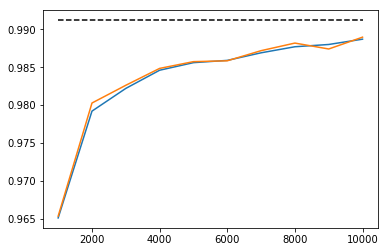

In [7]:
np.savez(os.path.join(out, 'log.npz'), **acc)

baseline_log = np.load(os.path.join('results', 'baseline_model', 'clean_test.npz'))
plt.plot(range(1000, 10000+1, 1000), np.ones(10)*baseline_log['accuracy'], 'k--')
plt.plot(range(1000, 10000+1, 1000), acc['clean_test'])
plt.plot(range(1000, 10000+1, 1000), acc['poison_test'])
plt.show()

### スクリーニング

In [8]:
backdoor_path = os.path.join('results', 'backdoor_model')
backdoor_model = net.CNV()
dummy_input = torch.Tensor(np.zeros((1, 1, 28, 28)).astype(np.float32))
_ = backdoor_model(dummy_input)
backdoor_model.load_state_dict(torch.load(os.path.join(backdoor_path, 'best_model.pt')))
backdoor_model = backdoor_model.eval()

precision    recall  f1-score   support

       False       0.96      1.00      0.98     47993
        True       1.00      0.05      0.09      2007

   micro avg       0.96      0.96      0.96     50000
   macro avg       0.98      0.52      0.54     50000
weighted avg       0.96      0.96      0.94     50000



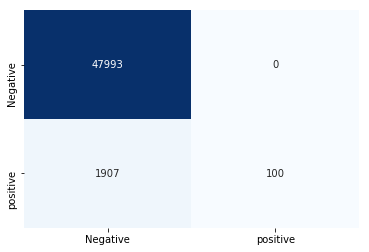

precision    recall  f1-score   support

       False       0.98      1.00      0.99     48937
        True       1.00      0.09      0.17      1063

   micro avg       0.98      0.98      0.98     50000
   macro avg       0.99      0.55      0.58     50000
weighted avg       0.98      0.98      0.97     50000



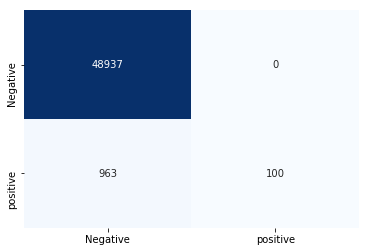

precision    recall  f1-score   support

       False       0.99      1.00      0.99     49183
        True       1.00      0.12      0.22       817

   micro avg       0.99      0.99      0.99     50000
   macro avg       0.99      0.56      0.61     50000
weighted avg       0.99      0.99      0.98     50000



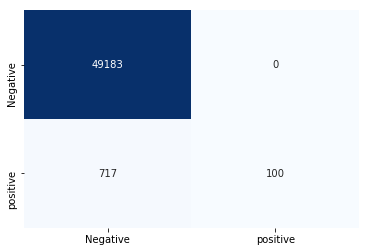

precision    recall  f1-score   support

       False       0.99      1.00      0.99     49326
        True       1.00      0.15      0.26       674

   micro avg       0.99      0.99      0.99     50000
   macro avg       0.99      0.57      0.63     50000
weighted avg       0.99      0.99      0.98     50000



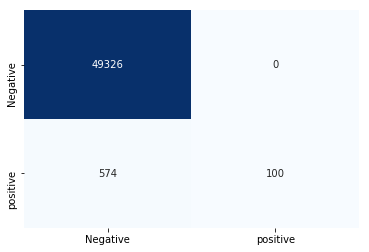

precision    recall  f1-score   support

       False       0.99      1.00      1.00     49420
        True       1.00      0.17      0.29       580

   micro avg       0.99      0.99      0.99     50000
   macro avg       1.00      0.59      0.64     50000
weighted avg       0.99      0.99      0.99     50000



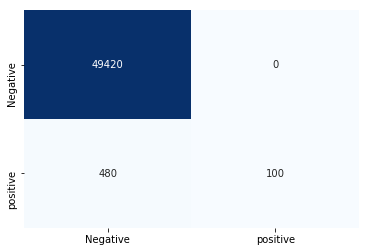

precision    recall  f1-score   support

       False       0.99      1.00      1.00     49498
        True       1.00      0.20      0.33       502

   micro avg       0.99      0.99      0.99     50000
   macro avg       1.00      0.60      0.66     50000
weighted avg       0.99      0.99      0.99     50000



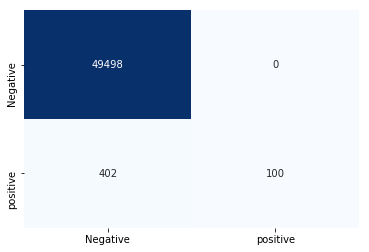

precision    recall  f1-score   support

       False       0.99      1.00      1.00     49526
        True       1.00      0.21      0.35       474

   micro avg       0.99      0.99      0.99     50000
   macro avg       1.00      0.61      0.67     50000
weighted avg       0.99      0.99      0.99     50000



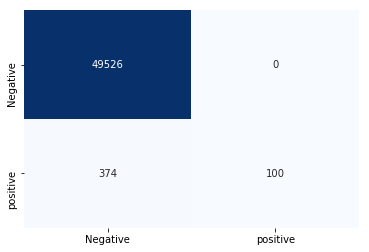

precision    recall  f1-score   support

       False       0.99      1.00      1.00     49553
        True       1.00      0.22      0.37       447

   micro avg       0.99      0.99      0.99     50000
   macro avg       1.00      0.61      0.68     50000
weighted avg       0.99      0.99      0.99     50000



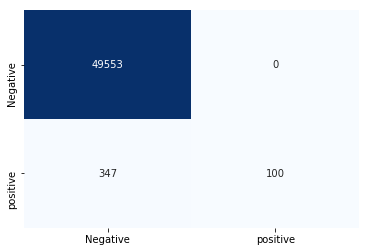

precision    recall  f1-score   support

       False       0.99      1.00      1.00     49556
        True       1.00      0.23      0.37       444

   micro avg       0.99      0.99      0.99     50000
   macro avg       1.00      0.61      0.68     50000
weighted avg       0.99      0.99      0.99     50000



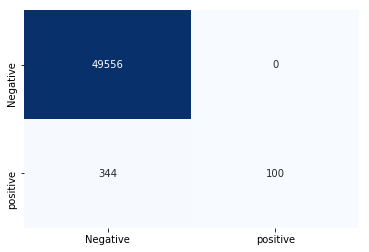

precision    recall  f1-score   support

       False       0.99      1.00      1.00     49647
        True       1.00      0.28      0.44       353

   micro avg       0.99      0.99      0.99     50000
   macro avg       1.00      0.64      0.72     50000
weighted avg       0.99      0.99      0.99     50000



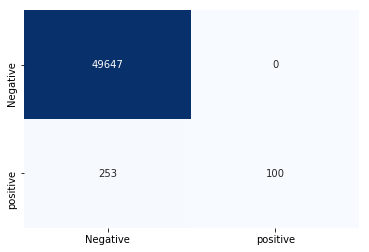

In [9]:
# Dataset
tr = np.load(os.path.join(ds_root, 'poison_training_dataset.npz'))
train_ds = bd.Dataset_from_array(x=tr['x'], t=tr['t'], transform=transform)
train_dl = torch.utils.data.DataLoader(train_ds, batch_size=128, shuffle=False)

# result output folder
out = os.path.join('results', 'screening')
os.makedirs(os.path.join(out), exist_ok=True)

res = {'Recall':[], 'FP':[], 'Precision':[]}
# 1000 to 10000
for N in range(1000, 10000+1, 1000):
    out2 = os.path.join(out, '{}'.format(N))
    os.makedirs(out2, exist_ok=True)

    # Distilled Model
    distilled_path = os.path.join('results', 'distilled_model', '{}'.format(N))
    distilled_model = net.CNV()
    dummy_input = torch.Tensor(np.zeros((1, 1, 28, 28)).astype(np.float32))
    _ = distilled_model(dummy_input)
    distilled_model.load_state_dict(torch.load(os.path.join(distilled_path, 'best_model.pt')))
    distilled_model = distilled_model.eval()

    screening = bd.distillation.Dataset_screening(train_dl, backdoor_model, distilled_model, device=device)
    screening.run()
    negative_dataset = screening.negative_dataset
    positive_dataset = screening.positive_dataset
    np.savez(os.path.join(out2, 'screening_negative_dataset.npz'), x=negative_dataset['x'], t=negative_dataset['t'])

    confmat, report = screening.eval(tr['t_correct'])
    print(report)
    bd.plot_util.plot_confusion_matrix(
        confmat,
        cmap='Blues',
        fmt='d',
        annot=True,
        cbar=False,
        xticklabels=['Negative', 'positive'],
        yticklabels=['Negative', 'positive']
    )

    np.savez(
        os.path.join(out2, 'result.npz'),
        negative_dataset = negative_dataset,
        positive_dataset = positive_dataset,
        confmat = confmat,
        report = report
    )

    TP = confmat[1,1]
    FN = confmat[0,1]
    FP = confmat[1,0]
    Recall = TP/(TP+FN)
    Precision = TP/(TP+FP)
    res['Recall'].append(Recall)
    res['Precision'].append(Precision)
    res['FP'].append(FP)

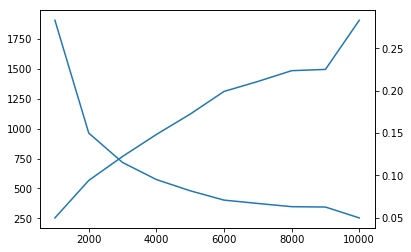

In [10]:
np.savez(os.path.join(out, 'log.npz'), **res)
fig = plt.figure()
ax = fig.add_subplot(111)
ax2 = ax.twinx()
ax.plot(range(1000, 10000+1, 1000), res['FP'])
ax2.plot(range(1000, 10000+1, 1000), res['Precision'])
#ax2.set_ylim((0.7, 1.0))
plt.show()

### Fine-tuning

1/50 Epoch, Train/Test Loss: 0.0138/0.0951,         Train/Test Accuracy: 0.9954/0.9755,         Elapsed/Remaining time: 0.10/4.80 [min]
2/50 Epoch, Train/Test Loss: 0.0069/0.1081,         Train/Test Accuracy: 0.9975/0.9770,         Elapsed/Remaining time: 0.19/4.54 [min]
3/50 Epoch, Train/Test Loss: 0.0064/0.1123,         Train/Test Accuracy: 0.9979/0.9765,         Elapsed/Remaining time: 0.28/4.32 [min]
4/50 Epoch, Train/Test Loss: 0.0071/0.1168,         Train/Test Accuracy: 0.9977/0.9764,         Elapsed/Remaining time: 0.36/4.11 [min]
5/50 Epoch, Train/Test Loss: 0.0040/0.0921,         Train/Test Accuracy: 0.9984/0.9801,         Elapsed/Remaining time: 0.45/4.02 [min]
6/50 Epoch, Train/Test Loss: 0.0106/0.1042,         Train/Test Accuracy: 0.9968/0.9783,         Elapsed/Remaining time: 0.54/4.00 [min]
7/50 Epoch, Train/Test Loss: 0.0046/0.0971,         Train/Test Accuracy: 0.9985/0.9790,         Elapsed/Remaining time: 0.62/3.79 [min]
8/50 Epoch, Train/Test Loss: 0.0021/0.0926,     

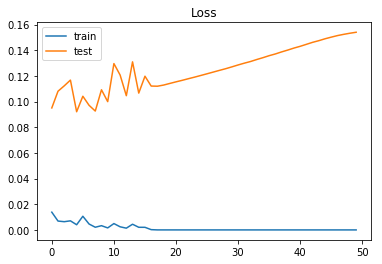

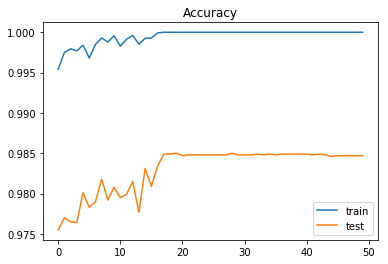

Accuracy: 0.985


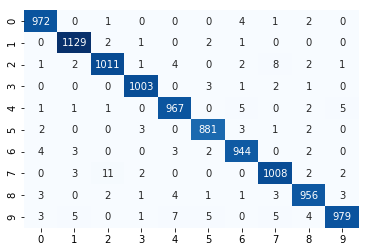

Accuracy: 0.9853990191707535


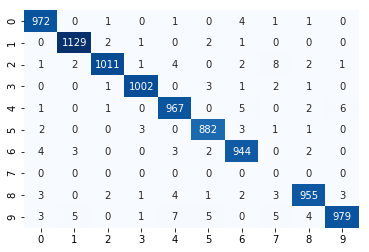

1/50 Epoch, Train/Test Loss: 0.0149/0.0696,         Train/Test Accuracy: 0.9946/0.9815,         Elapsed/Remaining time: 0.09/4.64 [min]
2/50 Epoch, Train/Test Loss: 0.0076/0.0812,         Train/Test Accuracy: 0.9974/0.9827,         Elapsed/Remaining time: 0.18/4.25 [min]
3/50 Epoch, Train/Test Loss: 0.0072/0.0704,         Train/Test Accuracy: 0.9977/0.9832,         Elapsed/Remaining time: 0.27/4.28 [min]
4/50 Epoch, Train/Test Loss: 0.0132/0.0972,         Train/Test Accuracy: 0.9955/0.9798,         Elapsed/Remaining time: 0.35/4.04 [min]
5/50 Epoch, Train/Test Loss: 0.0017/0.0701,         Train/Test Accuracy: 0.9994/0.9841,         Elapsed/Remaining time: 0.43/3.90 [min]
6/50 Epoch, Train/Test Loss: 0.0022/0.0784,         Train/Test Accuracy: 0.9993/0.9845,         Elapsed/Remaining time: 0.51/3.76 [min]
7/50 Epoch, Train/Test Loss: 0.0022/0.0890,         Train/Test Accuracy: 0.9993/0.9833,         Elapsed/Remaining time: 0.61/3.75 [min]
8/50 Epoch, Train/Test Loss: 0.0028/0.0788,     

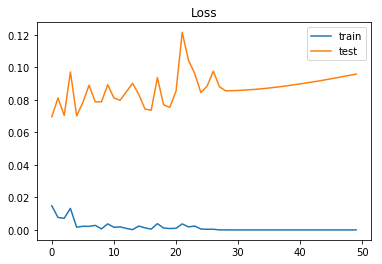

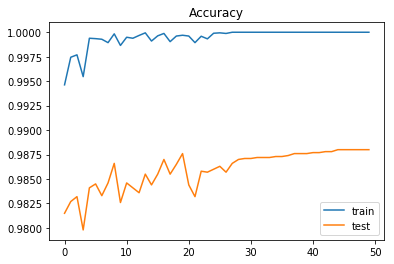

Accuracy: 0.988


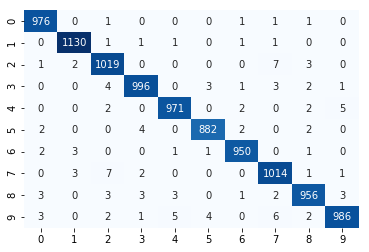

Accuracy: 0.9880740080249666


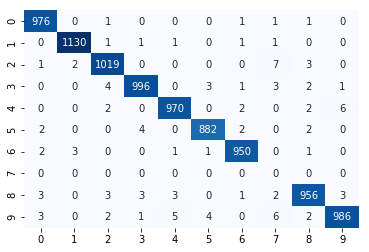

1/50 Epoch, Train/Test Loss: 0.0136/0.0801,         Train/Test Accuracy: 0.9956/0.9813,         Elapsed/Remaining time: 0.09/4.56 [min]
2/50 Epoch, Train/Test Loss: 0.0070/0.0669,         Train/Test Accuracy: 0.9976/0.9816,         Elapsed/Remaining time: 0.19/4.46 [min]
3/50 Epoch, Train/Test Loss: 0.0080/0.0757,         Train/Test Accuracy: 0.9973/0.9827,         Elapsed/Remaining time: 0.28/4.34 [min]
4/50 Epoch, Train/Test Loss: 0.0045/0.0721,         Train/Test Accuracy: 0.9987/0.9824,         Elapsed/Remaining time: 0.38/4.32 [min]
5/50 Epoch, Train/Test Loss: 0.0029/0.0752,         Train/Test Accuracy: 0.9991/0.9841,         Elapsed/Remaining time: 0.47/4.21 [min]
6/50 Epoch, Train/Test Loss: 0.0047/0.0735,         Train/Test Accuracy: 0.9985/0.9844,         Elapsed/Remaining time: 0.57/4.17 [min]
7/50 Epoch, Train/Test Loss: 0.0072/0.0761,         Train/Test Accuracy: 0.9976/0.9835,         Elapsed/Remaining time: 0.66/4.04 [min]
8/50 Epoch, Train/Test Loss: 0.0052/0.0753,     

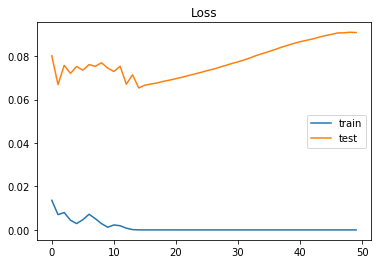

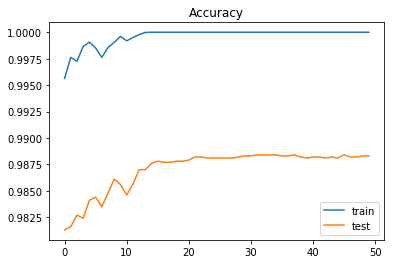

Accuracy: 0.9884


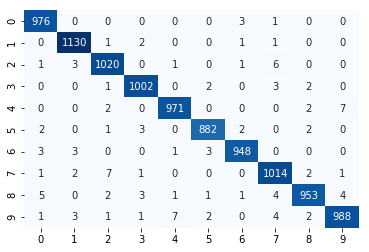

Accuracy: 0.9880740080249666


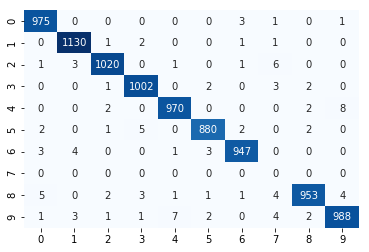

1/50 Epoch, Train/Test Loss: 0.0091/0.0581,         Train/Test Accuracy: 0.9970/0.9853,         Elapsed/Remaining time: 0.09/4.44 [min]
2/50 Epoch, Train/Test Loss: 0.0119/0.0698,         Train/Test Accuracy: 0.9959/0.9832,         Elapsed/Remaining time: 0.20/4.77 [min]
3/50 Epoch, Train/Test Loss: 0.0024/0.0588,         Train/Test Accuracy: 0.9992/0.9871,         Elapsed/Remaining time: 0.30/4.71 [min]
4/50 Epoch, Train/Test Loss: 0.0109/0.0703,         Train/Test Accuracy: 0.9962/0.9825,         Elapsed/Remaining time: 0.38/4.42 [min]
5/50 Epoch, Train/Test Loss: 0.0037/0.0696,         Train/Test Accuracy: 0.9988/0.9853,         Elapsed/Remaining time: 0.47/4.27 [min]
6/50 Epoch, Train/Test Loss: 0.0041/0.0723,         Train/Test Accuracy: 0.9984/0.9844,         Elapsed/Remaining time: 0.56/4.14 [min]
7/50 Epoch, Train/Test Loss: 0.0008/0.0663,         Train/Test Accuracy: 0.9997/0.9872,         Elapsed/Remaining time: 0.67/4.10 [min]
8/50 Epoch, Train/Test Loss: 0.0028/0.0671,     

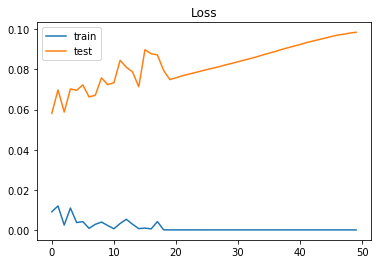

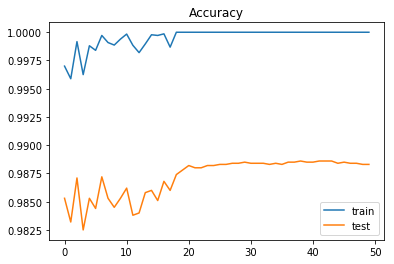

Accuracy: 0.9886


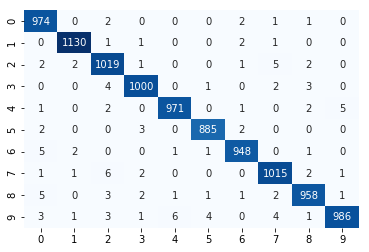

Accuracy: 0.9886312973695943


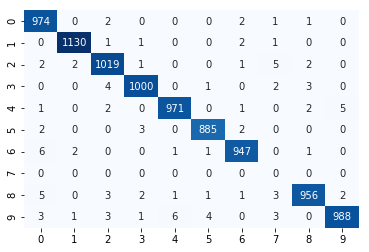

1/50 Epoch, Train/Test Loss: 0.0105/0.0631,         Train/Test Accuracy: 0.9965/0.9837,         Elapsed/Remaining time: 0.10/4.79 [min]
2/50 Epoch, Train/Test Loss: 0.0077/0.0637,         Train/Test Accuracy: 0.9975/0.9843,         Elapsed/Remaining time: 0.18/4.32 [min]
3/50 Epoch, Train/Test Loss: 0.0109/0.0936,         Train/Test Accuracy: 0.9965/0.9811,         Elapsed/Remaining time: 0.26/4.12 [min]
4/50 Epoch, Train/Test Loss: 0.0016/0.0588,         Train/Test Accuracy: 0.9995/0.9884,         Elapsed/Remaining time: 0.34/3.95 [min]
5/50 Epoch, Train/Test Loss: 0.0042/0.0616,         Train/Test Accuracy: 0.9985/0.9862,         Elapsed/Remaining time: 0.43/3.90 [min]
6/50 Epoch, Train/Test Loss: 0.0050/0.0672,         Train/Test Accuracy: 0.9983/0.9838,         Elapsed/Remaining time: 0.52/3.82 [min]
7/50 Epoch, Train/Test Loss: 0.0028/0.0610,         Train/Test Accuracy: 0.9991/0.9864,         Elapsed/Remaining time: 0.60/3.66 [min]
8/50 Epoch, Train/Test Loss: 0.0024/0.0668,     

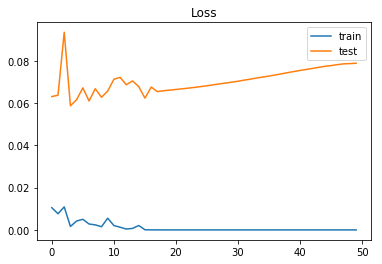

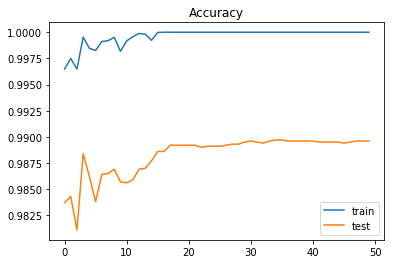

Accuracy: 0.9897


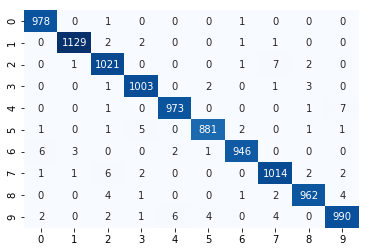

Accuracy: 0.9900802496656264


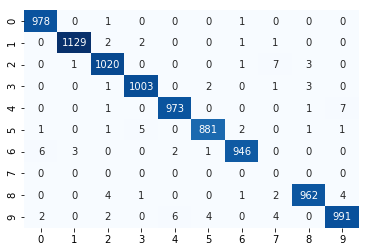

1/50 Epoch, Train/Test Loss: 0.0073/0.0581,         Train/Test Accuracy: 0.9976/0.9848,         Elapsed/Remaining time: 0.10/4.94 [min]
2/50 Epoch, Train/Test Loss: 0.0031/0.0504,         Train/Test Accuracy: 0.9989/0.9853,         Elapsed/Remaining time: 0.20/4.87 [min]
3/50 Epoch, Train/Test Loss: 0.0058/0.0641,         Train/Test Accuracy: 0.9983/0.9849,         Elapsed/Remaining time: 0.29/4.50 [min]
4/50 Epoch, Train/Test Loss: 0.0087/0.0808,         Train/Test Accuracy: 0.9972/0.9840,         Elapsed/Remaining time: 0.37/4.21 [min]
5/50 Epoch, Train/Test Loss: 0.0042/0.0578,         Train/Test Accuracy: 0.9986/0.9856,         Elapsed/Remaining time: 0.45/4.03 [min]
6/50 Epoch, Train/Test Loss: 0.0124/0.0880,         Train/Test Accuracy: 0.9962/0.9832,         Elapsed/Remaining time: 0.55/4.01 [min]
7/50 Epoch, Train/Test Loss: 0.0047/0.0747,         Train/Test Accuracy: 0.9986/0.9852,         Elapsed/Remaining time: 0.65/3.97 [min]
8/50 Epoch, Train/Test Loss: 0.0041/0.0648,     

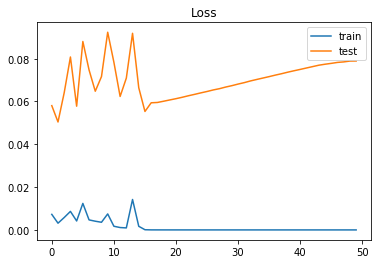

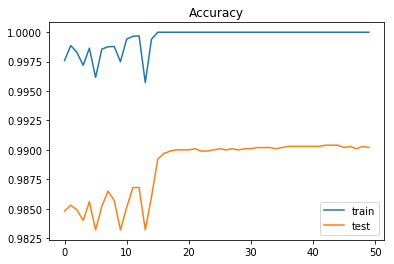

Accuracy: 0.9904


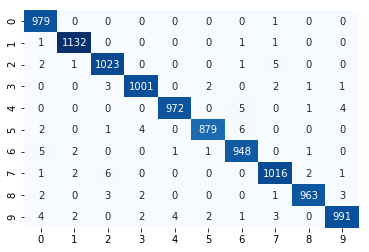

Accuracy: 0.9900802496656264


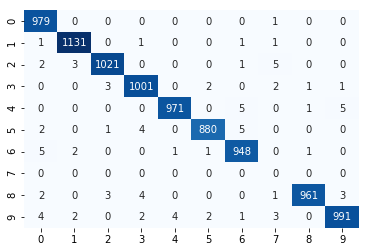

1/50 Epoch, Train/Test Loss: 0.0101/0.0696,         Train/Test Accuracy: 0.9963/0.9821,         Elapsed/Remaining time: 0.09/4.64 [min]
2/50 Epoch, Train/Test Loss: 0.0055/0.0596,         Train/Test Accuracy: 0.9984/0.9850,         Elapsed/Remaining time: 0.20/4.77 [min]
3/50 Epoch, Train/Test Loss: 0.0123/0.0834,         Train/Test Accuracy: 0.9960/0.9821,         Elapsed/Remaining time: 0.29/4.62 [min]
4/50 Epoch, Train/Test Loss: 0.0104/0.0869,         Train/Test Accuracy: 0.9967/0.9808,         Elapsed/Remaining time: 0.38/4.35 [min]
5/50 Epoch, Train/Test Loss: 0.0018/0.0599,         Train/Test Accuracy: 0.9994/0.9862,         Elapsed/Remaining time: 0.47/4.25 [min]
6/50 Epoch, Train/Test Loss: 0.0025/0.0635,         Train/Test Accuracy: 0.9992/0.9862,         Elapsed/Remaining time: 0.57/4.15 [min]
7/50 Epoch, Train/Test Loss: 0.0033/0.0665,         Train/Test Accuracy: 0.9990/0.9861,         Elapsed/Remaining time: 0.65/3.99 [min]
8/50 Epoch, Train/Test Loss: 0.0043/0.0736,     

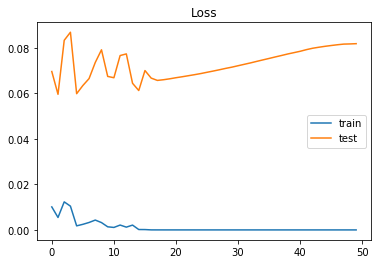

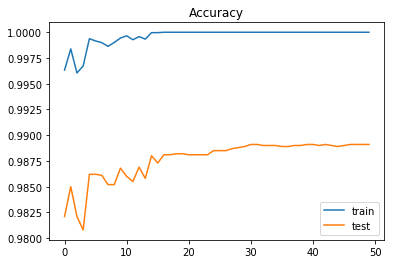

Accuracy: 0.9891


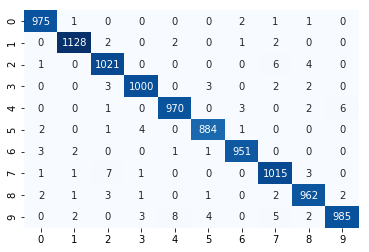

Accuracy: 0.9893000445831476


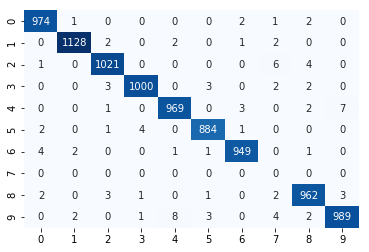

1/50 Epoch, Train/Test Loss: 0.0080/0.0571,         Train/Test Accuracy: 0.9973/0.9861,         Elapsed/Remaining time: 0.08/4.15 [min]
2/50 Epoch, Train/Test Loss: 0.0105/0.0669,         Train/Test Accuracy: 0.9968/0.9834,         Elapsed/Remaining time: 0.18/4.27 [min]
3/50 Epoch, Train/Test Loss: 0.0063/0.0636,         Train/Test Accuracy: 0.9979/0.9855,         Elapsed/Remaining time: 0.27/4.23 [min]
4/50 Epoch, Train/Test Loss: 0.0033/0.0680,         Train/Test Accuracy: 0.9989/0.9844,         Elapsed/Remaining time: 0.37/4.28 [min]
5/50 Epoch, Train/Test Loss: 0.0025/0.0653,         Train/Test Accuracy: 0.9992/0.9857,         Elapsed/Remaining time: 0.46/4.11 [min]
6/50 Epoch, Train/Test Loss: 0.0116/0.0730,         Train/Test Accuracy: 0.9962/0.9816,         Elapsed/Remaining time: 0.54/3.98 [min]
7/50 Epoch, Train/Test Loss: 0.0125/0.0887,         Train/Test Accuracy: 0.9959/0.9806,         Elapsed/Remaining time: 0.65/3.96 [min]
8/50 Epoch, Train/Test Loss: 0.0014/0.0758,     

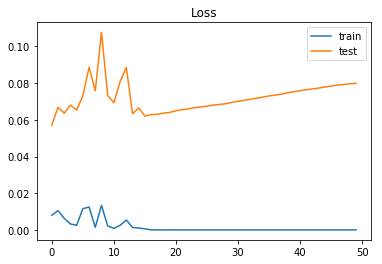

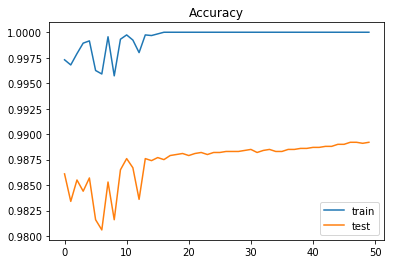

Accuracy: 0.9892


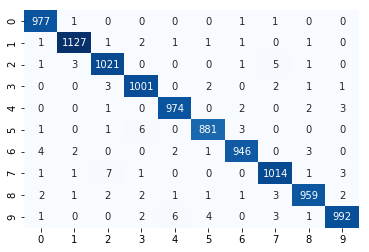

Accuracy: 0.9896344181899243


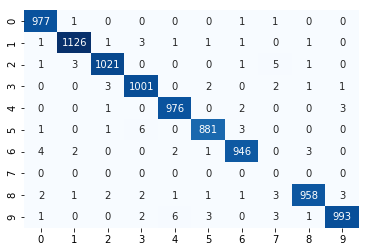

1/50 Epoch, Train/Test Loss: 0.0057/0.0541,         Train/Test Accuracy: 0.9981/0.9867,         Elapsed/Remaining time: 0.10/4.91 [min]
2/50 Epoch, Train/Test Loss: 0.0048/0.0605,         Train/Test Accuracy: 0.9985/0.9860,         Elapsed/Remaining time: 0.20/4.82 [min]
3/50 Epoch, Train/Test Loss: 0.0038/0.0674,         Train/Test Accuracy: 0.9987/0.9851,         Elapsed/Remaining time: 0.30/4.63 [min]
4/50 Epoch, Train/Test Loss: 0.0041/0.0622,         Train/Test Accuracy: 0.9986/0.9848,         Elapsed/Remaining time: 0.38/4.36 [min]
5/50 Epoch, Train/Test Loss: 0.0195/0.1040,         Train/Test Accuracy: 0.9938/0.9783,         Elapsed/Remaining time: 0.45/4.09 [min]
6/50 Epoch, Train/Test Loss: 0.0027/0.0620,         Train/Test Accuracy: 0.9992/0.9862,         Elapsed/Remaining time: 0.55/4.07 [min]
7/50 Epoch, Train/Test Loss: 0.0026/0.0686,         Train/Test Accuracy: 0.9991/0.9858,         Elapsed/Remaining time: 0.64/3.92 [min]
8/50 Epoch, Train/Test Loss: 0.0015/0.0592,     

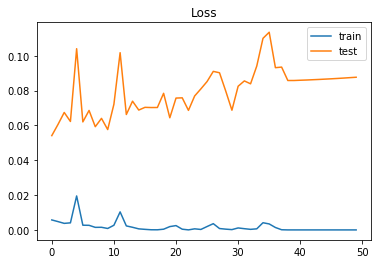

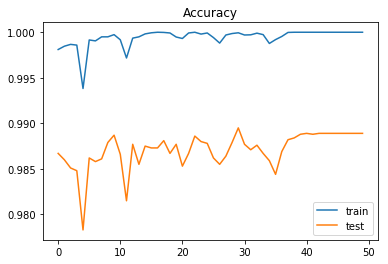

Accuracy: 0.9895


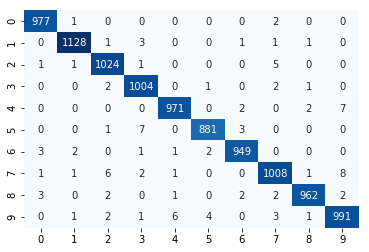

Accuracy: 0.9905260811413286


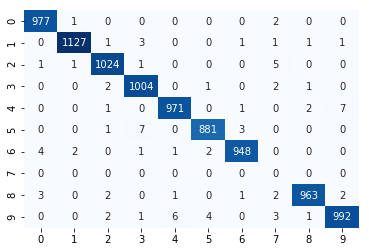

1/50 Epoch, Train/Test Loss: 0.0077/0.0607,         Train/Test Accuracy: 0.9975/0.9861,         Elapsed/Remaining time: 0.10/5.12 [min]
2/50 Epoch, Train/Test Loss: 0.0043/0.0581,         Train/Test Accuracy: 0.9985/0.9861,         Elapsed/Remaining time: 0.19/4.44 [min]
3/50 Epoch, Train/Test Loss: 0.0072/0.0618,         Train/Test Accuracy: 0.9977/0.9852,         Elapsed/Remaining time: 0.28/4.37 [min]
4/50 Epoch, Train/Test Loss: 0.0095/0.0702,         Train/Test Accuracy: 0.9971/0.9842,         Elapsed/Remaining time: 0.38/4.37 [min]
5/50 Epoch, Train/Test Loss: 0.0028/0.0621,         Train/Test Accuracy: 0.9990/0.9875,         Elapsed/Remaining time: 0.47/4.26 [min]
6/50 Epoch, Train/Test Loss: 0.0013/0.0654,         Train/Test Accuracy: 0.9996/0.9874,         Elapsed/Remaining time: 0.57/4.16 [min]
7/50 Epoch, Train/Test Loss: 0.0011/0.0626,         Train/Test Accuracy: 0.9996/0.9890,         Elapsed/Remaining time: 0.65/4.01 [min]
8/50 Epoch, Train/Test Loss: 0.0052/0.0860,     

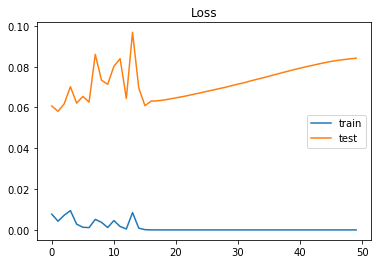

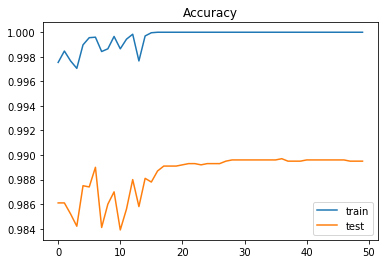

Accuracy: 0.9897


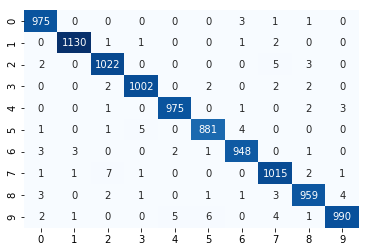

Accuracy: 0.9896344181899243


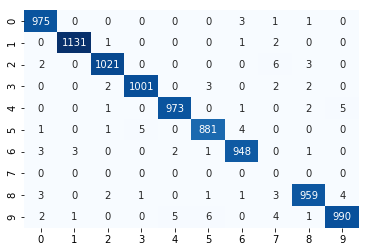

In [14]:
# result output folder
out = os.path.join('results', 'fine_tuned_model')
os.makedirs(os.path.join(out), exist_ok=True)

acc = {'clean_test':[], 'poison_test':[]}
# 1000 to 10000
for N in range(1000, 10000+1, 1000):
    out2 = os.path.join(out, '{}'.format(N))
    os.makedirs(out2, exist_ok=True)

    ds_root = os.path.join('.', 'results', 'datasets')
    tr = np.load(os.path.join('.', 'results', 'screening', '{}'.format(N), 'screening_negative_dataset.npz'))
    train_ds = bd.Dataset_from_array(x=tr['x'], t=tr['t'], transform=transform)
    train_dl = torch.utils.data.DataLoader(train_ds, batch_size=128, shuffle=True)

    # Model
    model = net.CNV()
    dummy_input = torch.Tensor(np.zeros((1, 1, 28, 28)).astype(np.float32))
    model(dummy_input)
    model.load_state_dict(torch.load(os.path.join('results', 'distilled_model', '{}'.format(N), 'best_model.pt')))
    model = model.eval()

    # Train
    trainer = bd.Trainer(train_dl, test_dl, model, device)
    optimizer = torch.optim.Adam
    epoch = 50

    trainer.run(optimizer, epoch, out2)

    # Save result
    torch.save(model.state_dict(), os.path.join(out2, 'final_model.pt'))

    np.savez(os.path.join(out2, 'log.npz'), **trainer.log)

    # Plot and save log figures
    log = np.load(os.path.join(out2, 'log.npz'))
    bd.plot_util.plot_training_logs(log, out2)

    val_model = net.CNV()
    dummy_input = torch.Tensor(np.zeros((1, 1, 28, 28)).astype(np.float32))
    val_model(dummy_input)
    val_model.load_state_dict(torch.load(os.path.join(out2, 'best_model.pt')))
    val_model = val_model.eval()

    evaluator = bd.Evaluator(val_model, 10, device=device)

    # Evaluation against clean dataset
    ret = evaluator.run(
        test_dl,
        out=os.path.join(out2, 'clean_test'),
        cmap='Blues',
        fmt='d',
        annot=True,
        cbar=False
    )
    acc['clean_test'].append(ret[1])

    # Evaluation against poison dataset
    ret = evaluator.run(
        test_p_dl,
        out=os.path.join(out2, 'poison_test'),
        cmap='Blues',
        fmt='d',
        annot=True,
        cbar=False
    )
    acc['poison_test'].append(ret[1])

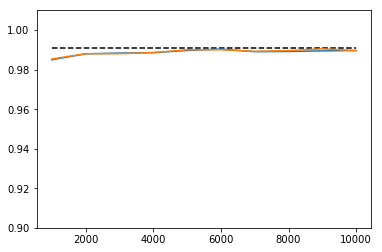

In [15]:
np.savez(os.path.join(out, 'log.npz'), **acc)

baseline_log = np.load(os.path.join('results', 'baseline_model', 'clean_test.npz'))
plt.plot(range(1000, 10000+1, 1000), np.ones(10)*baseline_log['accuracy'], 'k--')
plt.plot(range(1000, 10000+1, 1000), acc['clean_test'])
plt.plot(range(1000, 10000+1, 1000), acc['poison_test'])
plt.ylim(0.9, 1.01)
plt.show()

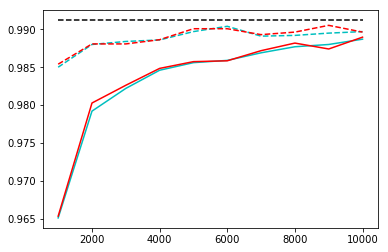

In [16]:
baseline_clean = np.load(os.path.join('results', 'baseline_model', 'clean_test.npz'))
#baseline_poison = 
distill = np.load(os.path.join('results', 'distilled_model', 'log.npz'))
fine_tune = np.load(os.path.join('results', 'fine_tuned_model', 'log.npz'))


plt.plot(range(1000, 10000+1, 1000), np.ones(10)*baseline_clean['accuracy'], 'k--')
plt.plot(range(1000, 10000+1, 1000), distill['clean_test'], 'c')
plt.plot(range(1000, 10000+1, 1000), distill['poison_test'], 'r')
plt.plot(range(1000, 10000+1, 1000), fine_tune['clean_test'], 'c--')
plt.plot(range(1000, 10000+1, 1000), fine_tune['poison_test'], 'r--')
plt.show()